# Holt-Winter (Tripple Exponential Smoothing)

Created by Faris | 29.03.21

Source: Lost

Please note that this method is for **seasonal data only**

### Necessary Libraries

In [38]:
# Normal libraries
import pandas as pd
import matplotlib.pyplot as plt

# For the modell
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

# For error
import sklearn
import math
from sklearn.metrics import mean_squared_error

### Dataset

##### Import data

In [11]:
df = pd.read_csv("Los_Angeles_International.csv", parse_dates = [0], index_col =0, dayfirst= True, thousands = ",")


print(df)

            Passengers
Date                  
2013-01-01     2395018
2013-02-01     2157939
2013-03-01     2653755
2013-04-01     2586235
2013-05-01     2790145
...                ...
2019-08-01     3936915
2019-09-01     3399994
2019-10-01     3497202
2019-11-01     3326902
2019-12-01     3626678

[84 rows x 1 columns]


##### Data splitting

In [7]:
train = df.iloc[:60]
test = df.iloc[49:]
for_comparing = df.iloc[60:]


for_comparing.head(10)

,Passengers
Date,
2018-01-01,3196356
2018-02-01,2950653
2018-03-01,3559029
2018-04-01,3461659
2018-05-01,3713675
2018-06-01,3983870
2018-07-01,4066465
2018-08-01,3957892
2018-09-01,3331632


##### Early visualization

Full data

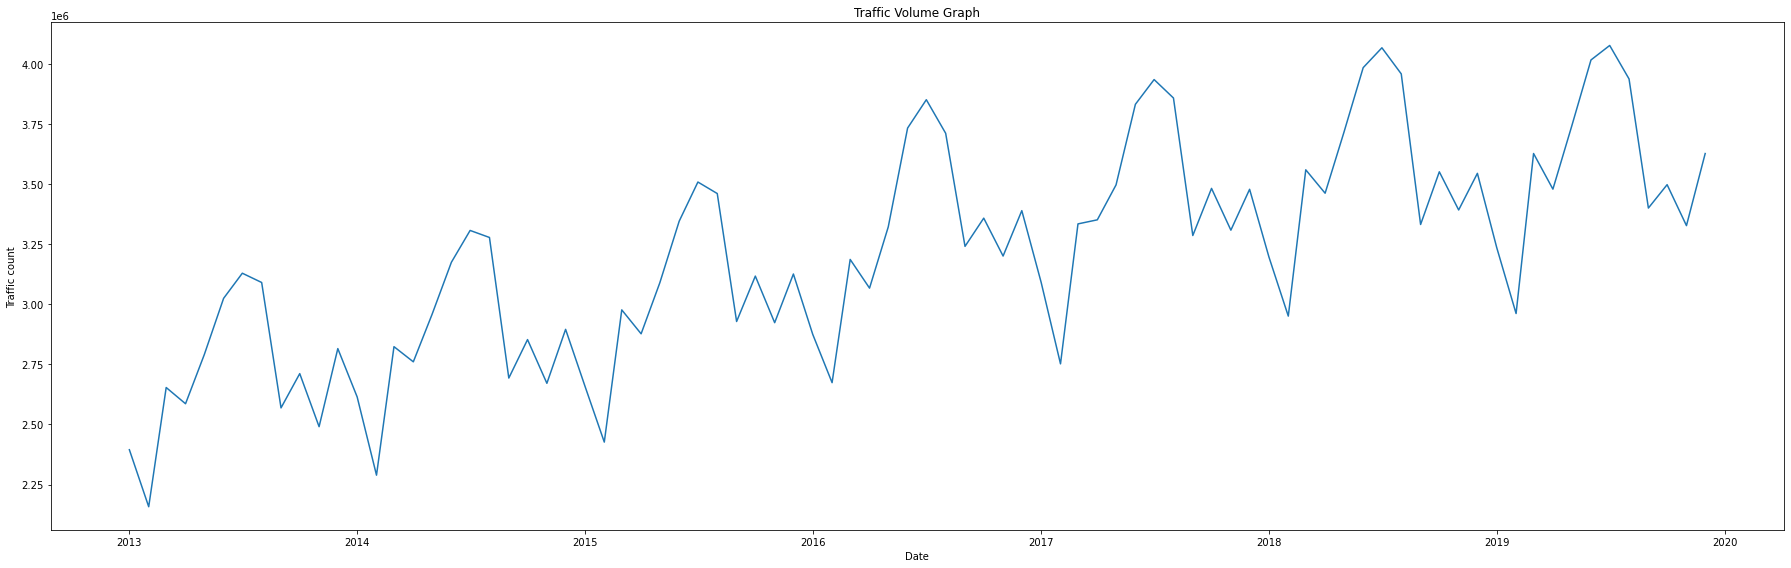

In [25]:
plt.subplots(figsize=(25, 8))
plt.title("Traffic Volume Graph")
plt.xlabel("Date")
plt.ylabel("Traffic count")
plt.tight_layout()
plt.plot(df)

Seasonal

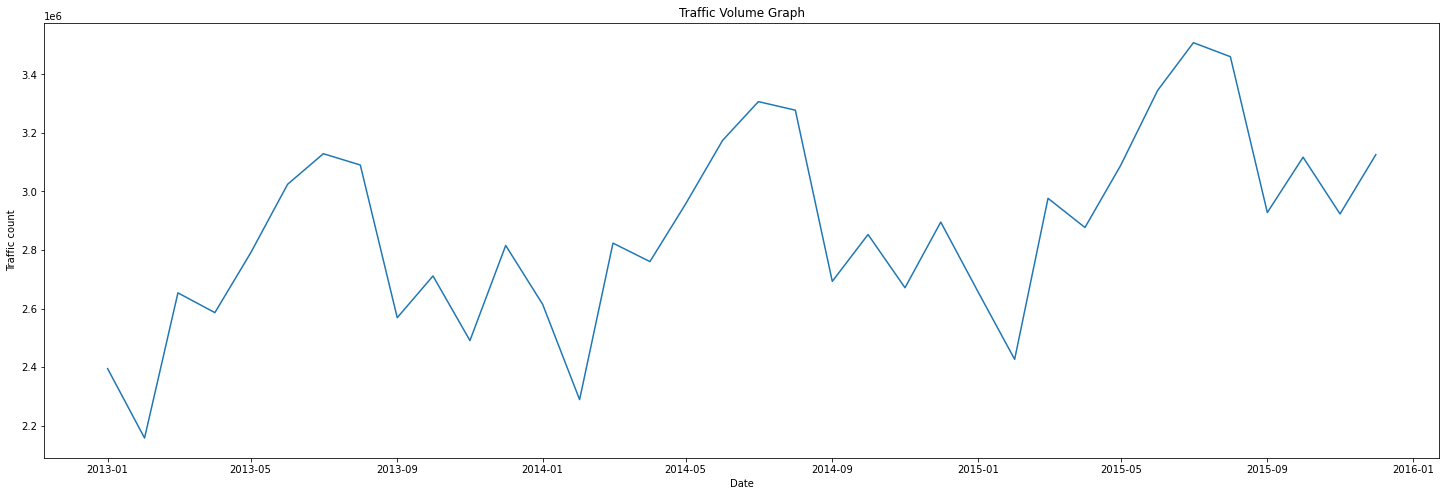

In [26]:
seasonal = df.iloc[:36]
plt.subplots(figsize=(25, 8))
plt.title("Traffic Volume Graph")
plt.xlabel("Date")
plt.ylabel("Traffic count")
plt.plot(seasonal)

### Holt-Winter model fitting

##### Function

In [29]:
def Holt_Winter(Data, Periods, Trend, Seasonal, Title):
    Holt_Winter = ExponentialSmoothing(Data, seasonal_periods = Periods, trend = Trend,
                                    seasonal = Seasonal).fit(use_boxcox=True)
    
    plt.subplots(figsize=(25, 8))
    plt.title(Title)
    plt.xlabel("Date")
    plt.ylabel("Passengers Count")
    
    Holt_Winter.fittedvalues.plot(color = "blue", marker = "o")
    Holt_Winter.forecast(36).plot(style = "--", marker = "o", color  = "red",
                           label = "Forecast", legend = True)

##### Forecast

Full data

nb: ignore the red text, it is not important

/home/user/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/user/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/home/user/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:1112: FutureWarning: Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.
  warnings.warn(
/home/user/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


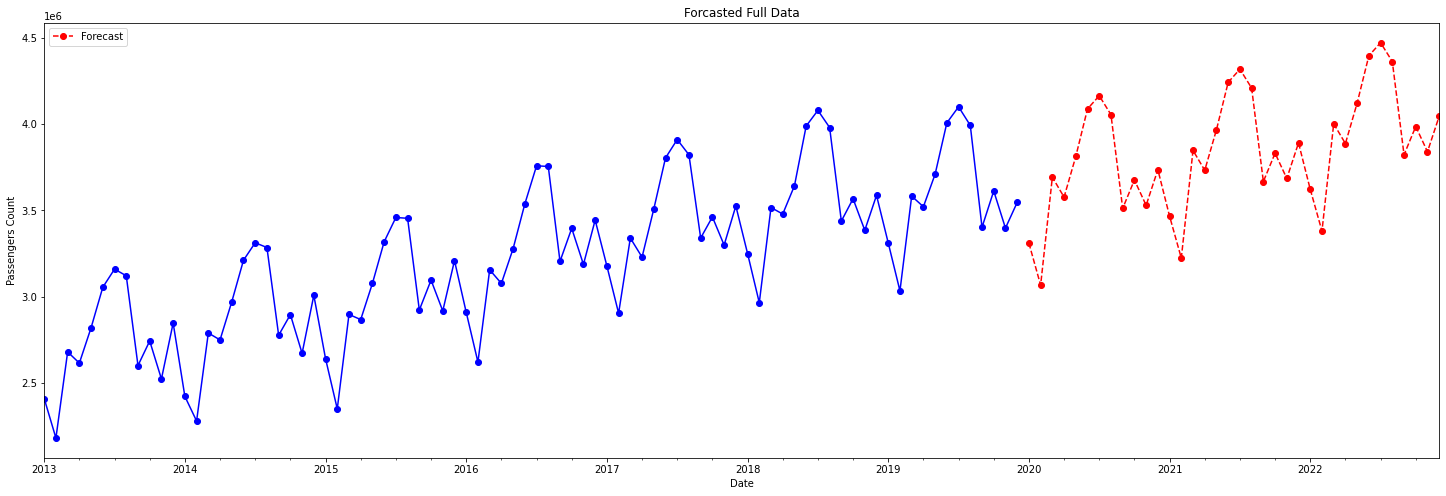

In [30]:
Holt_Winter(df, 12, "additive", "additive",
            "Forcasted Full Data")

Train data

/home/user/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/user/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/home/user/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:1112: FutureWarning: Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.
  warnings.warn(


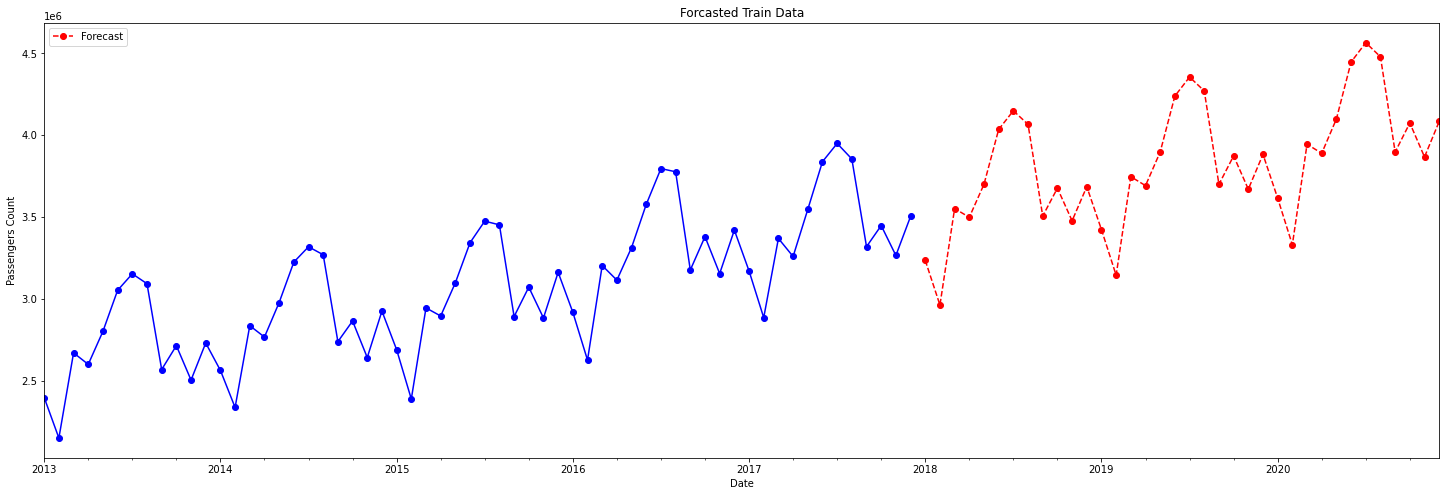

In [33]:
Holt_Winter(train, 12, "additive", "additive",
            "Forcasted Train Data")

Test data

/home/user/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/user/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/home/user/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:1112: FutureWarning: Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.
  warnings.warn(
/home/user/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


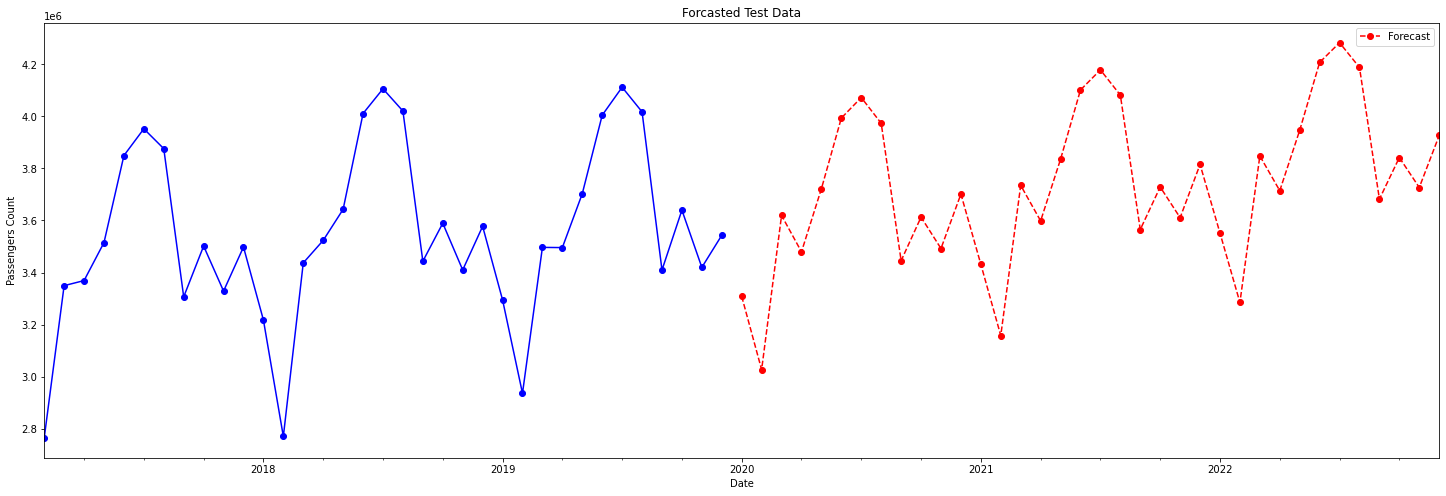

In [34]:
Holt_Winter(test, 12, "additive", "additive",
            "Forcasted Test Data")

##### Comparing and error check

Comparing forcasted train and original data

/home/user/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/user/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/home/user/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:1112: FutureWarning: Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.
  warnings.warn(


<AxesSubplot:title={'center':'Comparing Forcasted Train Data and The Original Data'}, xlabel='Date', ylabel='Passengers Count'>

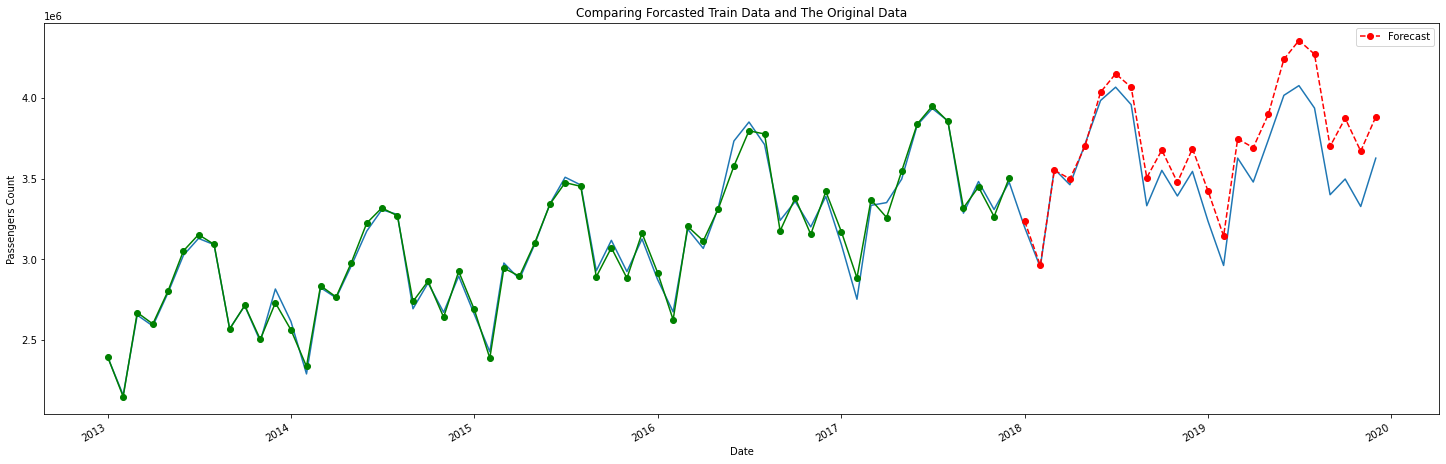

In [37]:
fit_train = ExponentialSmoothing(train, seasonal_periods = 12, trend = "additive", seasonal = "additive").fit(use_boxcox=True)

plt.subplots(figsize=(25, 8))
plt.title("Comparing Forcasted Train Data and The Original Data")
plt.xlabel("Date")
plt.ylabel("Passengers Count")
plt.plot(df)
fit_train.fittedvalues.plot(color = "green", marker = "o")
forcasting = fit_train.forecast(24)
forcasting.plot(style = "--", marker = "o", color  = "red", label = "Forecast", legend = True)

Error check

In [40]:
# Fitting
mse = mean_squared_error(for_comparing, forcasting)
rmse = math.sqrt(mse)

# Output
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 37732810427.95931
Root Mean Squared Error: 194249.3511648348
